<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import seaborn as sns

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
csv_path = './sat_scores.csv'

with open(csv_path, newline='') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=',')
    # initialize data dictionary with column names
    data = {cn:[] for cn in csvreader.fieldnames}
    for row in csvreader:
        for k in row.keys():
            data[k].append(row[k])

print(data)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
sat_df_from_dict = pd.DataFrame(data)
sat_df_from_pandas = pd.read_csv(csv_path)

print('** Dataframe datatypes from SAT dictionary **')
print(sat_df_from_dict.dtypes)

print('** Dataframe datatypes from pandas .read_csv() **')
print(sat_df_from_pandas.dtypes)

** Dataframe datatypes from SAT dictionary **
State     object
Rate      object
Verbal    object
Math      object
dtype: object
** Dataframe datatypes from pandas .read_csv() **
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [4]:
sat_df = sat_df_from_pandas
sat_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [5]:
sat_df.isnull().sum()

State     0
Rate      0
Verbal    0
Math      0
dtype: int64

In [6]:
sat_df.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [7]:
sat_df.shape

(52, 4)

<img src="https://png.icons8.com/office/40/000000/test-passed.png" style="float: left; margin: 25px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue"/>

### SAT Scores Data Dictionary 

SAT scores has 52 rows and 4 columns.  The columns are:


| Variable | Type | Description |
|--- | --- | --- |
| *State* | string | Abbreviated state name. |
| *Rate* | integer | Participation rate from the state in percentage. | 
| *Verbal* | integer | Average Verbal score for the state. Maximum should be 800. |
| *Math* | integer | Average Math score for the state. Maximum should be 800. |

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

C:\Users\mail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


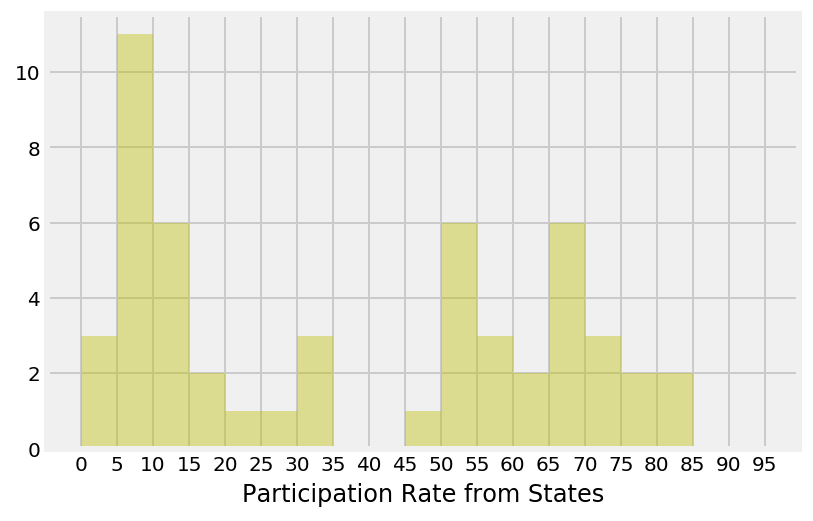

In [8]:
ax = sns.distplot(sat_df['Rate'], kde=False, bins=range(0,100,5), color='y', axlabel='Participation Rate from States')
_ = ax.set_xticks(range(0,100,5))


C:\Users\mail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


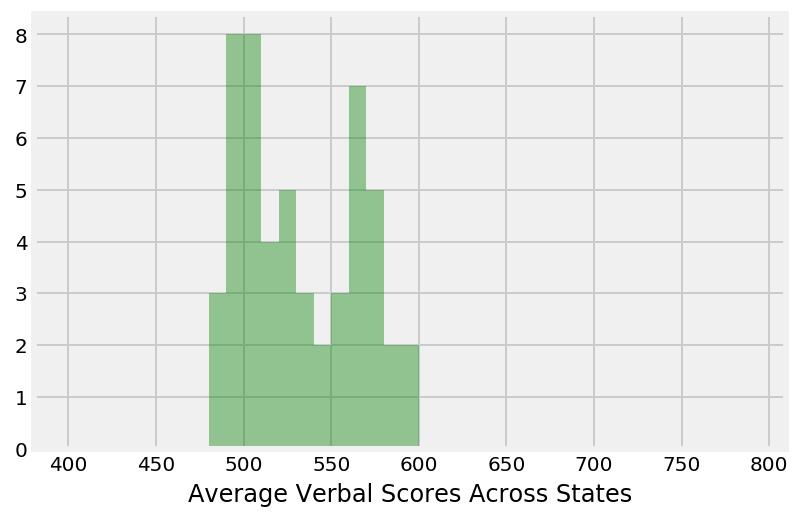

In [9]:
ax = sns.distplot(sat_df['Verbal'], kde=False, bins=range(400,800,10), color='g', axlabel='Average Verbal Scores Across States')
_ = ax.set_xticks(range(400,800,10), minor=True)

C:\Users\mail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


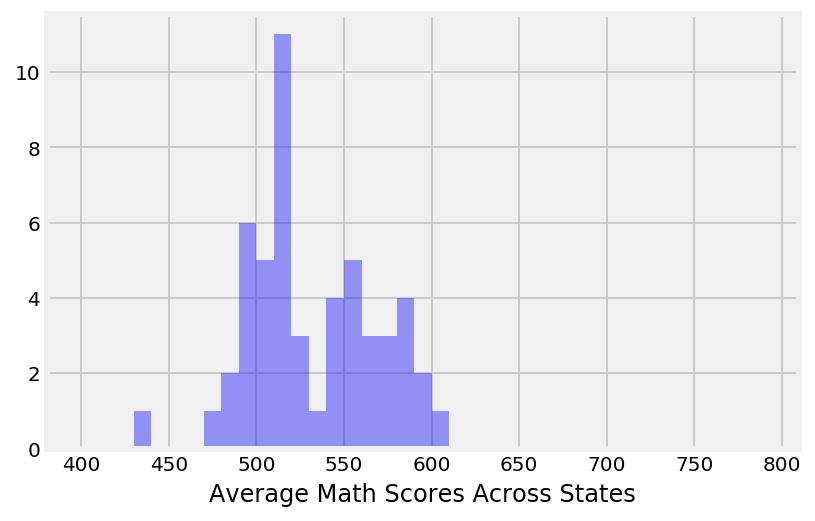

In [10]:
ax = sns.distplot(sat_df['Math'], kde=False, bins=range(400,800,10), color='b', axlabel='Average Math Scores Across States')
_ = ax.set_xticks(range(400,800,10), minor=True)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

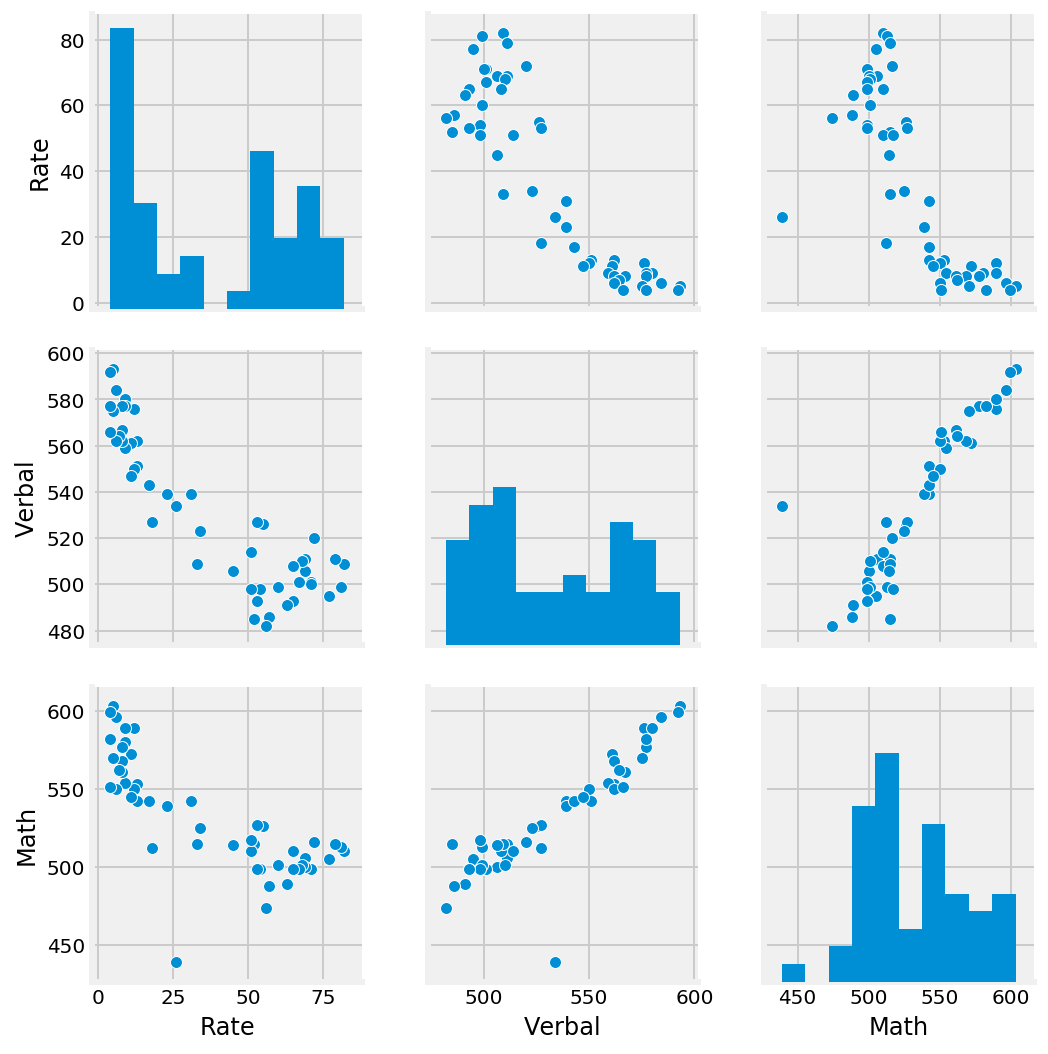

In [11]:
g = sns.pairplot(sat_df)

<img src="https://png.icons8.com/office/40/000000/test-passed.png" style="float: left; margin: 25px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue">
    
### Observations From the Pair Plots:

From the pair plots, these can be observed:

1. Verbal scores and Maths scores seem to be positively correlated i.e. states with higher average Verbal scores have higher average Maths scores, and vice versa.
2. Participation rate seem to be inversely correlated with both Maths and Verbal average scores, ie.e states with lower participation rate seem to have higher average scores, or states with higher participation rate seem to have lower average scores.



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

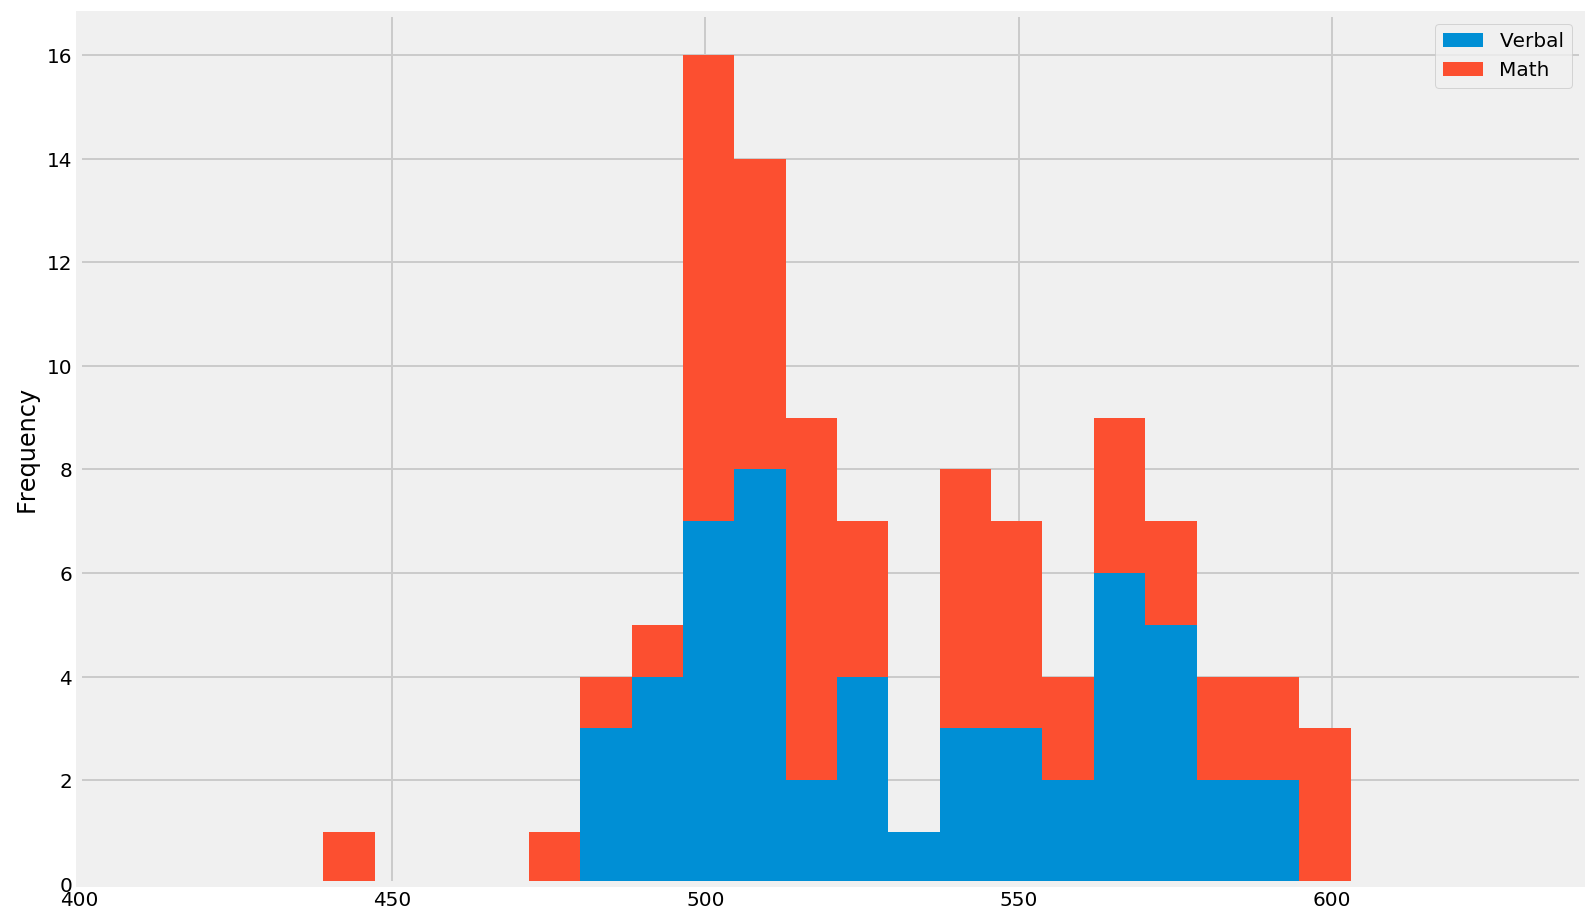

In [12]:
fig = plt.figure(figsize=(12,8));

ax = fig.gca()

ax = sat_df[['Verbal','Math']].plot.hist(stacked=True, bins=20, ax=ax)
_ = ax.set_xticks(range(400,650,10), minor=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

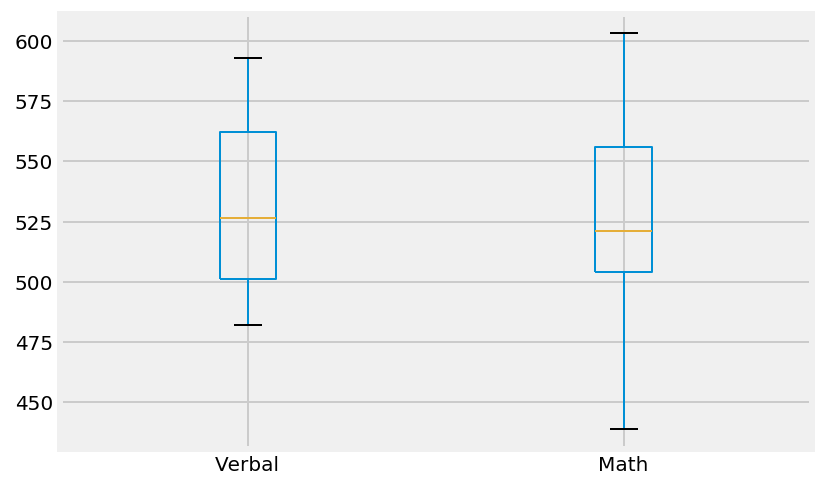

In [13]:
sat_df[['Verbal','Math']].plot.box()

<img src="https://png.icons8.com/office/40/000000/test-passed.png" style="float: left; margin: 25px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue">
    
### Benefits of Using Boxplot compared to scatterplot or histogram

Boxplots give us a quick summary of the distribution: its central value, and its variability.  

Over the scatterplot or histogram, boxplots provides us with the:
1. First quartile, Q1, as the bottom edge of the box.
2. Median, as a line in the center of the box.
3. Third quartile, Q3, shown at the upper edge of the box.

_(Boxplot also tells us the minimum and maximum value but these can also be inferred from the scatterplot or histogram.)_

### What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?

Rate is not on the same scale as Math and Verbal hence box-plotting them on the same chart is not meaningful.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="https://png.icons8.com/office/40/000000/test-passed.png" style="float: left; margin: 20px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue">
    
We have to rescale the variables using a procedure called "standardization," which forces the distribution of each variable to have a mean of 0 and a standard deviation of 1.

standardized_variable = (variable - mean_of_variable) / std_dev_of_variable

Text(0.5,1,'Differences in Distribution Shapes for Rate, Verbal and Math')

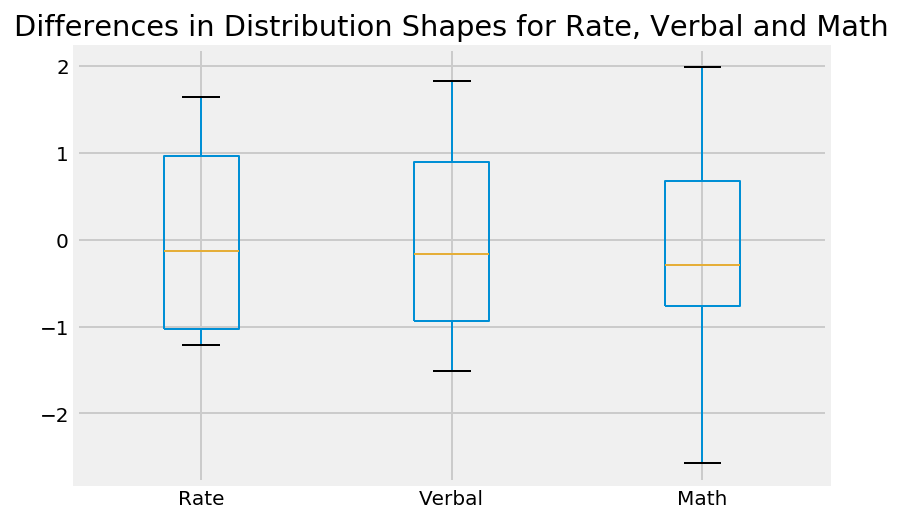

In [14]:
sat_df_num = sat_df[['Rate','Verbal','Math']]
sat_df_num_std = (sat_df_num [['Rate','Verbal','Math']] - sat_df_num .mean()) / sat_df_num .std()

ax = sat_df_num_std.plot.box()
ax.set_title('Differences in Distribution Shapes for Rate, Verbal and Math')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [15]:
sat_df[sat_df['Verbal'] > sat_df['Verbal'].mean()].shape[0]

24

<img src="https://png.icons8.com/office/40/000000/test-passed.png" style="float: left; margin: 5px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue">

Given 24 out of 52 states, or about half of states have Verbal scores higher than the average, this tells us the distribution of Verbal scores is roughly equal on either side of the means, i.e. roughly symmetrical.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [16]:
sat_df[sat_df['Verbal'] > sat_df['Verbal'].median()].shape[0]

26

<img src="https://png.icons8.com/office/40/000000/test-passed.png" style="float: left; margin: 5px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue">

The number of states with Verbal scores greater than median is roughly similar to that greater than mean.
This is because given the distribution is roughly symmetrical, the mean is roughly in the middle of the distribution, i.e. similar to the median.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [17]:
sat_df.loc[:,'Verbal-Math'] = sat_df['Verbal'] - sat_df['Math']
sat_df.sample(10)

,State,Rate,Verbal,Math,Verbal-Math
45,AR,6,562,550,12
48,SD,4,577,582,-5
38,KS,9,577,580,-3
25,NV,33,509,515,-6
0,CT,82,509,510,-1
18,FL,54,498,499,-1
12,NC,65,493,499,-6
5,RI,71,501,499,2
42,MO,8,577,577,0
36,MI,11,561,572,-11


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [18]:
sat_df[sat_df['Verbal-Math'] > 0].sort_values(by='Verbal-Math',ascending=False).head(10).head(3)

,State,Rate,Verbal,Math,Verbal-Math
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [19]:
sat_df[sat_df['Verbal-Math'] < 0].sort_values(by='Verbal-Math',ascending=True).head(10).head(3)

,State,Rate,Verbal,Math,Verbal-Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [20]:
sat_df.corr()

,Rate,Verbal,Math,Verbal-Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal-Math,-0.101412,0.052600,-0.388219,1.000000


<img src="https://png.icons8.com/office/40/000000/test-passed.png" style="float: left; margin: 0px 15px 0px 0px; height: 45px">

<font color="DarkSlateBlue">

This correlation matrix tells us similar things to the pairplot:
<br />
<br />
* Verbal scores and Maths scores are highly positively correlated i.e. states with higher average Verbal scores seem to have higher average Maths scores, and vice versa.
* Participation rate are inversely correlated with both Maths and Verbal average scores, ie.e states with lower participation rate seem to have higher average scores, or states with higher participation rate seem to have lower average scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [21]:
sat_df.describe()

,Rate,Verbal,Math,Verbal-Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="https://png.icons8.com/office/40/000000/test-passed.png" style="float: left; margin: 0px 15px 0px 0px; height: 45px">

<font color="DarkSlateBlue">
Meaning of each row of describe() output:

||Index |Meaning |
|:---|:--- |:---- |
|1.| count| Number of non-null values for the column |
|2.| mean| Mean of values for the column |
|3.| std| Standard deviation of values for the column |
|4.| min| Minimum of values for the column |
|5.| 25%| 25% percentile of values for the column |
|6.| 50%| 50% percentile of values for the column, i.e. Median |
|7.| 75%| 75% percentil of values for the column |
|8.| max| Maximum ofvalues for the column |


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [22]:
sat_df.cov()

,Rate,Verbal,Math,Verbal-Math
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal-Math,-43.552036,27.499623,-219.931373,247.430995


<img src="https://png.icons8.com/office/40/000000/test-passed.png" style="float: left; margin: 0px 15px 0px 0px; height: 45px">

<font color="DarkSlateBlue">
    
### Covariance vs Correlation    
    
1. The correlation matrix numbers ranges from -1 to 1, while the covariance matrix numbers have ranges between that and does not seem to be fixed.
2. Let `$X$` and `$Y$` be our two variables and using the covariance `$cov(X, Y)$`:
### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$
3. Covariance is harder to interpret as the figure is not scaled i.e. is affected by the units of both variables. Whereas correlation coefficients are standardized, or is scaled.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [23]:
drug_df = pd.read_csv('drug-use-by-age.csv')
drug_df.shape

(17, 28)

In [24]:
# check for any null values
drug_df.isnull().count()

age                        17
n                          17
alcohol-use                17
alcohol-frequency          17
marijuana-use              17
marijuana-frequency        17
cocaine-use                17
cocaine-frequency          17
crack-use                  17
crack-frequency            17
heroin-use                 17
heroin-frequency           17
hallucinogen-use           17
hallucinogen-frequency     17
inhalant-use               17
inhalant-frequency         17
pain-releiver-use          17
pain-releiver-frequency    17
oxycontin-use              17
oxycontin-frequency        17
tranquilizer-use           17
tranquilizer-frequency     17
stimulant-use              17
stimulant-frequency        17
meth-use                   17
meth-frequency             17
sedative-use               17
sedative-frequency         17
dtype: int64

<img src="https://png.icons8.com/nolan/40/000000/test-tube.png" style="float: left; margin: 5px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue">
No null values.

In [73]:
# check that the age groups make sense 
drug_df[['age']]

,age
0,12
1,13
2,14
3,15
4,16
5,17
6,18
7,19
8,20
9,21


In [26]:
drug_df.sample(10)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5


In [27]:
# check data types
drug_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

<img src="https://png.icons8.com/nolan/40/000000/test-tube.png" style="float: left; margin: 5px 15px 0px 0px; height: 45px">
<font color="Red">
**Some columns for frequency values e.g. "crack-frequency", are of type object rather than float64. Need to check why and convert them to a numeric value, otherwise the affected columns cannot be used for visualization.**

In [37]:
# fish out non-numeric values where columns need to be numeric but is string now

# these are the fishy columns
cols_that_should_be_float=['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']

for c in cols_that_should_be_float:
    print('\nNon-numeric values in {}:'.format(c))
    # fish out the values in this column will result in a null when converted to numeric
    print(drug_df[['age',c]][drug_df[c].apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull()])    


Non-numeric values in cocaine-frequency:
Empty DataFrame
Columns: [age, cocaine-frequency]
Index: []

Non-numeric values in crack-frequency:
Empty DataFrame
Columns: [age, crack-frequency]
Index: []

Non-numeric values in heroin-frequency:
Empty DataFrame
Columns: [age, heroin-frequency]
Index: []

Non-numeric values in inhalant-frequency:
Empty DataFrame
Columns: [age, inhalant-frequency]
Index: []

Non-numeric values in oxycontin-frequency:
Empty DataFrame
Columns: [age, oxycontin-frequency]
Index: []

Non-numeric values in meth-frequency:
Empty DataFrame
Columns: [age, meth-frequency]
Index: []


<img src="https://png.icons8.com/nolan/40/000000/test-tube.png" style="float: left; margin: 5px 15px 0px 0px; height: 45px">
<font color="Red">
As the '-' (missing) values occur at the borderline age group, it is reasonable to replace them with zero.

In [34]:
# replace all '-' values with zero
for c in cols_that_should_be_float:
    drug_df.loc[drug_df[c].apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull() , c] = 0

In [39]:
# convert all offending columns to float ...finally...
for c in cols_that_should_be_float:
    drug_df.loc[:,c] = drug_df[c].astype(float)

drug_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [61]:
# check for valid percentage values for those columns ending with 'use', like oxycontin-use
cols_that_should_be_percentages = [c for c in drug_df.columns if c.endswith('use')]

for c in cols_that_should_be_percentages:
    print('\nNon-percentage values in {}:'.format(c))
    # fish out the values in this column are not percentages
    print(drug_df[drug_df[c].apply(lambda x: x < 0 or x > 100)][c])


Non-percentage values in alcohol-use:
Series([], Name: alcohol-use, dtype: float64)

Non-percentage values in marijuana-use:
Series([], Name: marijuana-use, dtype: float64)

Non-percentage values in cocaine-use:
Series([], Name: cocaine-use, dtype: float64)

Non-percentage values in crack-use:
Series([], Name: crack-use, dtype: float64)

Non-percentage values in heroin-use:
Series([], Name: heroin-use, dtype: float64)

Non-percentage values in hallucinogen-use:
Series([], Name: hallucinogen-use, dtype: float64)

Non-percentage values in inhalant-use:
Series([], Name: inhalant-use, dtype: float64)

Non-percentage values in pain-releiver-use:
Series([], Name: pain-releiver-use, dtype: float64)

Non-percentage values in oxycontin-use:
Series([], Name: oxycontin-use, dtype: float64)

Non-percentage values in tranquilizer-use:
Series([], Name: tranquilizer-use, dtype: float64)

Non-percentage values in stimulant-use:
Series([], Name: stimulant-use, dtype: float64)

Non-percentage values in

<img src="https://png.icons8.com/nolan/40/000000/test-tube.png" style="float: left; margin: 5px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue">
All percentage values are valid.

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

<img src="https://png.icons8.com/nolan/40/000000/test-tube.png" style="float: left; margin: 5px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue">

Based on the EDA below, these were observed:


* Drug usage increases as age increases and peaks at twenties, then declines again.
* Alcohol and marijuana are the most popular drugs in terms of percentage in age groups who use it, as well as generally the most frequently used.
* Heroin and Tranquilizer is low in % usage across age groups, however for the minority who do use it the frequency is very high.

#### Summary Statistics

In [63]:
# describe to get summary statistics
drug_df.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [126]:
drug_means_df = drug_df.mean()
drug_means_df

n                          3251.058824
alcohol-use                  55.429412
alcohol-frequency            33.352941
marijuana-use                18.923529
marijuana-frequency          42.941176
cocaine-use                   2.176471
cocaine-frequency             7.411765
crack-use                     0.294118
crack-frequency              12.382353
heroin-use                    0.352941
heroin-frequency             68.970588
hallucinogen-use              3.394118
hallucinogen-frequency        8.411765
inhalant-use                  1.388235
inhalant-frequency            5.794118
pain-releiver-use             6.270588
pain-releiver-frequency      14.705882
oxycontin-use                 0.935294
oxycontin-frequency          13.941176
tranquilizer-use              2.805882
tranquilizer-frequency       11.735294
stimulant-use                 1.917647
stimulant-frequency          31.147059
meth-use                      0.382353
meth-frequency               31.735294
sedative-use             

In [216]:
# add age groups as an integer value to dataframe, may come in handy
drug_df['age_group'] = drug_df.index.values

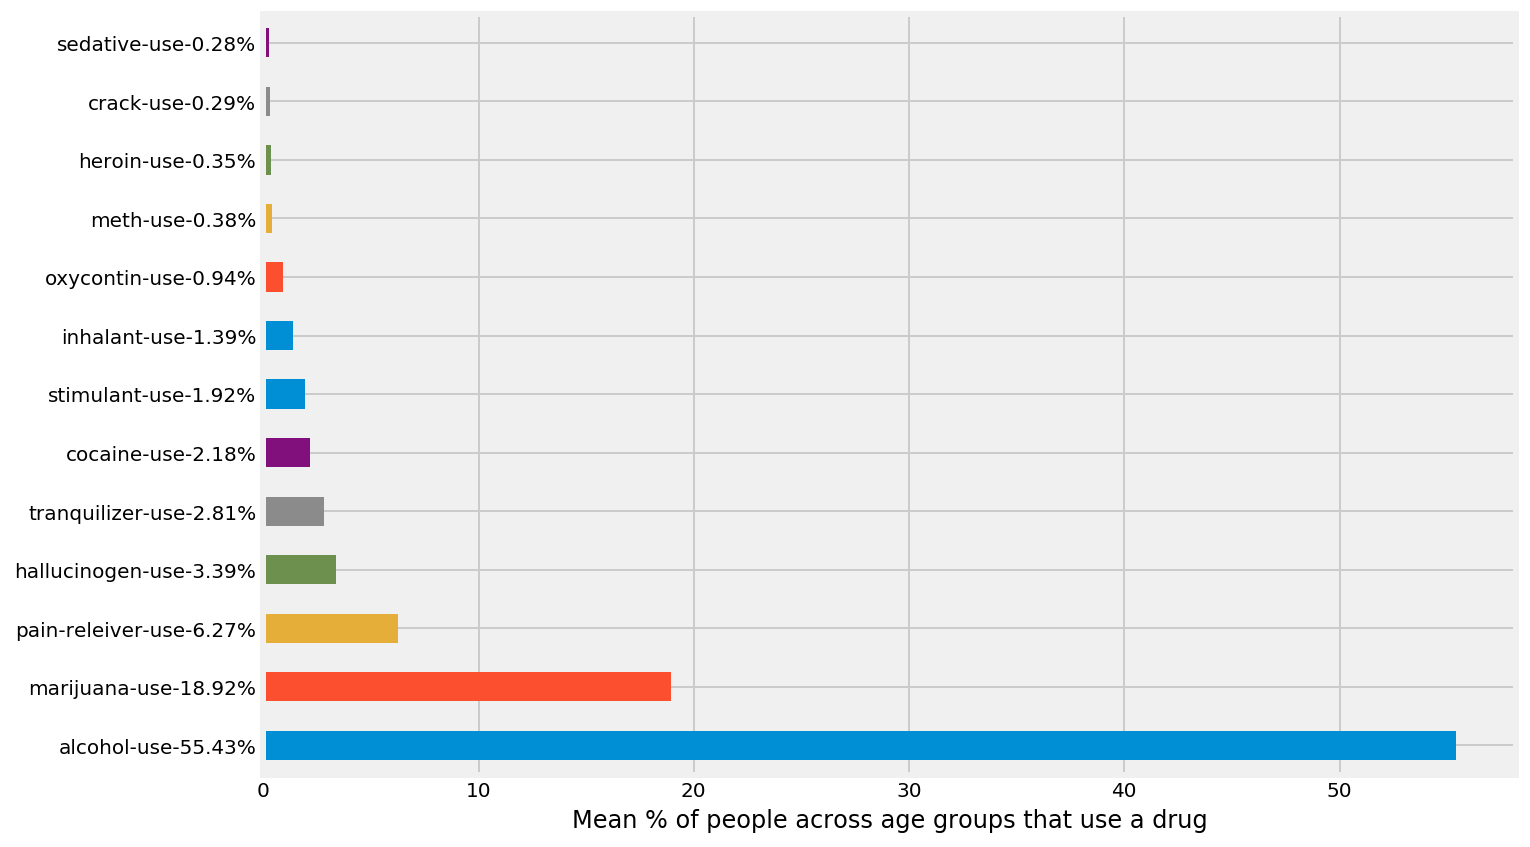

In [200]:
# From summary stats, alcohol is the most popular across all age groups let's confirm
# The mean percentage use of drugs across age groups
cols_drug_use = [c for c in drug_df.columns if c.endswith('use')]
df_plot = drug_means_df[cols_drug_use].sort_values(ascending=False)
ax = df_plot.plot.barh(figsize=(10,7))
_ = ax.set_xlabel('Mean % of people across age groups that use a drug', fontsize=12)
_ = ax.set_yticklabels(df_plot.index.values + '-' + df_plot.values.round(decimals=2).astype(str) + '%')

<img src="https://png.icons8.com/nolan/40/000000/test-tube.png" style="float: left; margin: 5px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue">
From the mean drug use (mean % of people across age groups who used the drug in the past 12 months), alcohol (whopping 55%), marijuana (18%), pain_reliever(6%) are the most widely used across age groups. 

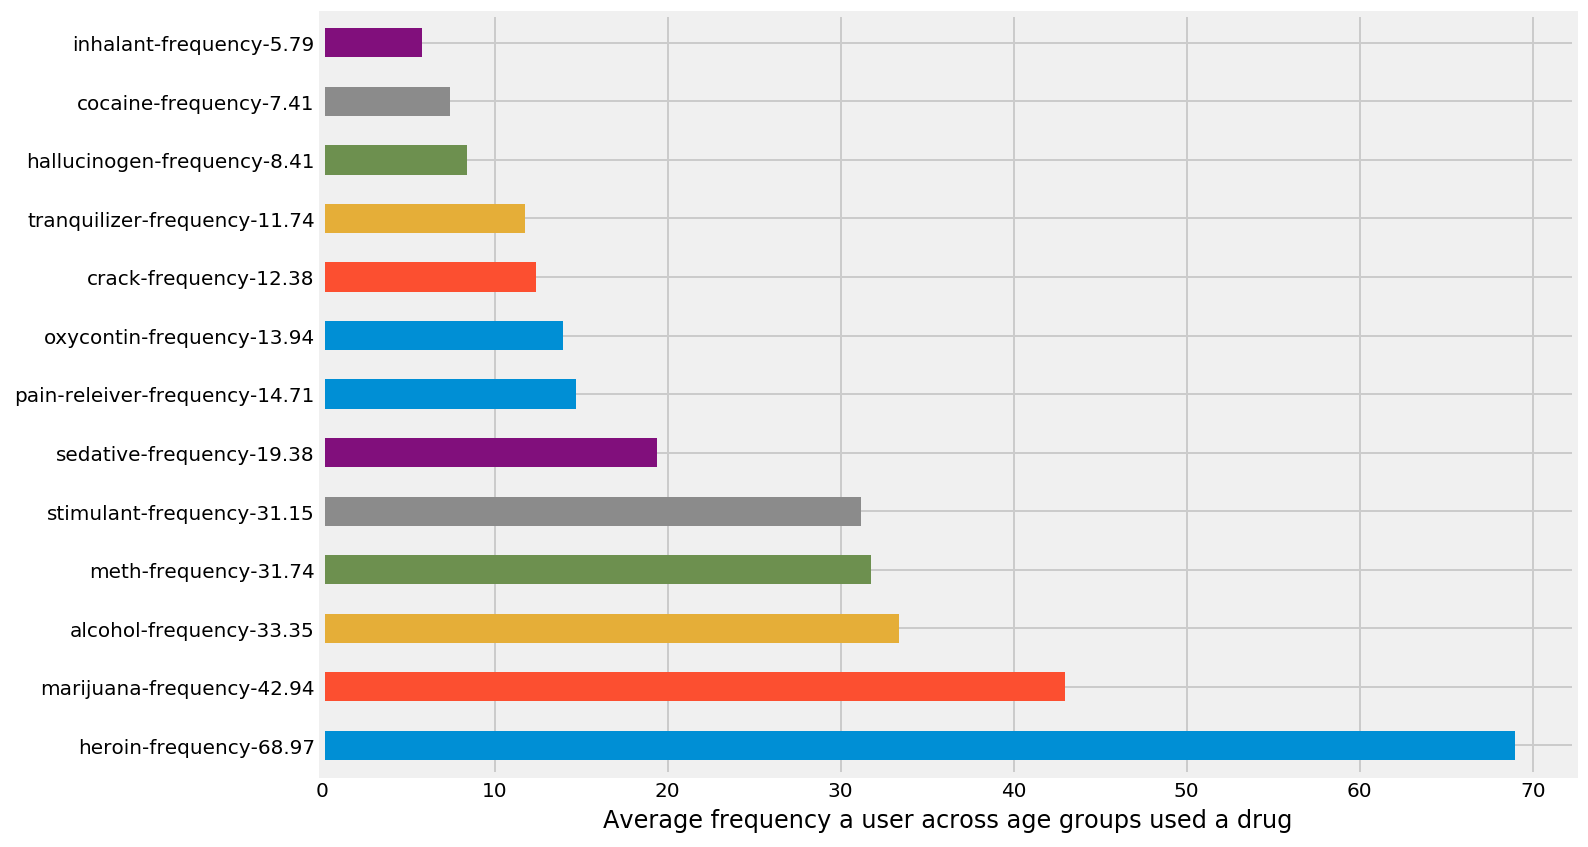

In [141]:
# The mean frequency use of drugs across age groups
cols_drug_frequency = [c for c in drug_df.columns if c.endswith('frequency')]
df_plot = drug_means_df[cols_drug_frequency].sort_values(ascending=False)
ax = df_plot.plot.barh(figsize=(10,7))
_ = ax.set_xlabel('Average frequency a user across age groups used a drug', fontsize=12)
_ = ax.set_yticklabels(df_plot.index.values + '-' + df_plot.values.round(decimals=2).astype(str))

In [151]:
drug_means_df[sorted(cols_drug_use)]

alcohol-use          55.429412
cocaine-use           2.176471
crack-use             0.294118
hallucinogen-use      3.394118
heroin-use            0.352941
inhalant-use          1.388235
marijuana-use        18.923529
meth-use              0.382353
oxycontin-use         0.935294
pain-releiver-use     6.270588
sedative-use          0.282353
stimulant-use         1.917647
tranquilizer-use      2.805882
dtype: float64

In [166]:
# build a dataframe containing the columns to use for scatterplot
# notice I sort the labels to ensure correct matching of drug values...probably not necessary...but I am running out of time to experiment :(
drug_means_df_long = pd.DataFrame(data={'mean_drug_use':drug_means_df[sorted(cols_drug_use)].values, \
                                        'mean_drug_frequency':drug_means_df[sorted(cols_drug_frequency)].values})
drug_means_df_long['drug'] = [c.replace('-use','') for c in sorted(cols_drug_use)]
drug_means_df_long 

,mean_drug_use,mean_drug_frequency,drug
0,55.429412,33.352941,alcohol
1,2.176471,7.411765,cocaine
2,0.294118,12.382353,crack
3,3.394118,8.411765,hallucinogen
4,0.352941,68.970588,heroin
5,1.388235,5.794118,inhalant
6,18.923529,42.941176,marijuana
7,0.382353,31.735294,meth
8,0.935294,13.941176,oxycontin
9,6.270588,14.705882,pain-releiver


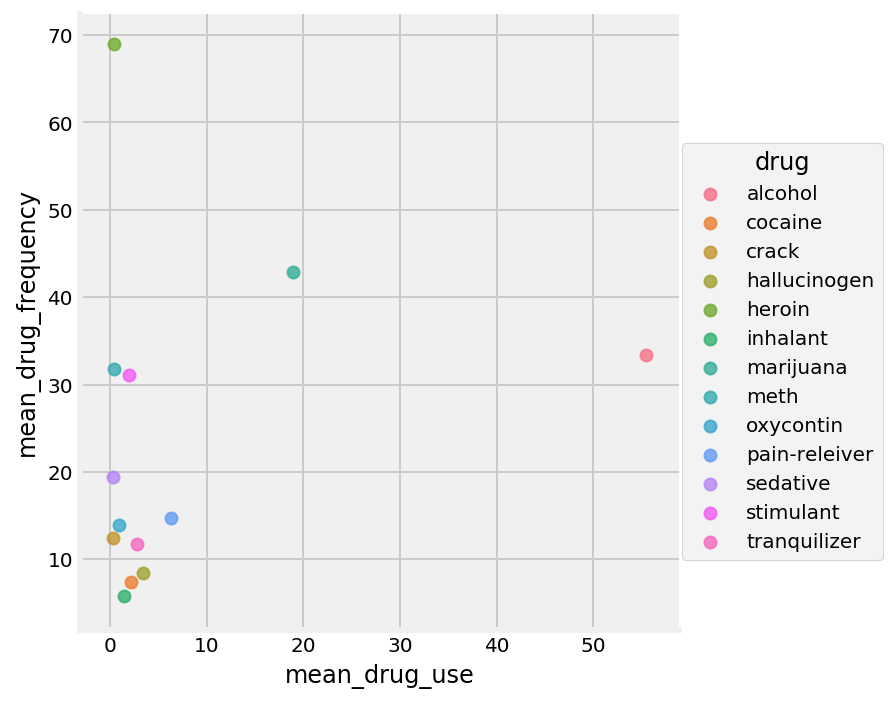

In [176]:
#f, ax = plt.subplots(figsize=(6.5, 6.5))
_ = sns.despine(f, left=True, bottom=True)
_ = sns.lmplot( x="mean_drug_use", y="mean_drug_frequency", data=drug_means_df_long, fit_reg=False, hue='drug', legend=True)

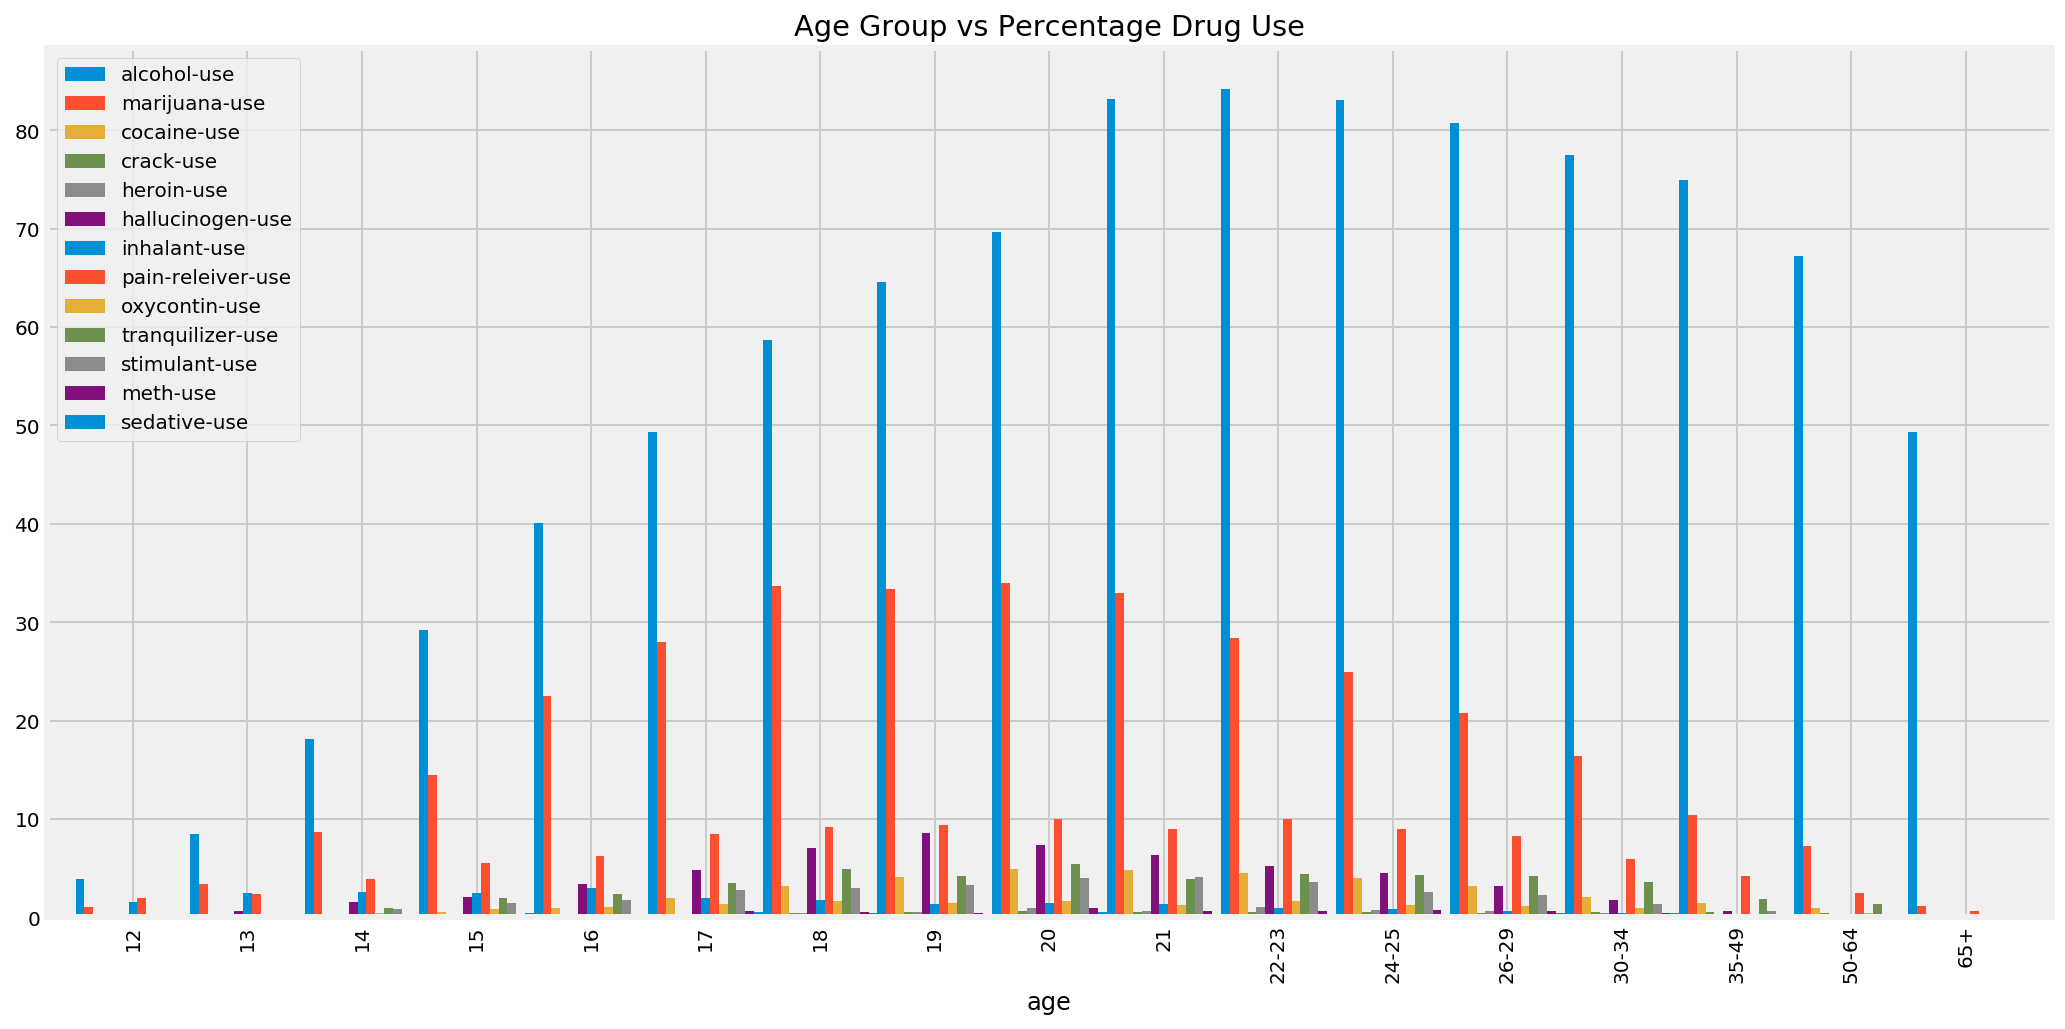

In [236]:
# plot the age group vs % drug use
_ = drug_df[pd.Series('age').append(pd.Series(cols_drug_use))].plot.bar(x='age',figsize=(16,8),width=1,title='Age Group vs Percentage Drug Use')

In [222]:
# create another column for mean % drug use per age group
drug_df['mean_drug_use'] = drug_df[cols_drug_use].mean(axis=1)
drug_df[['age','mean_drug_use']]

,age,mean_drug_use
0,12,0.746154
1,13,1.415385
2,14,2.884615
3,15,4.584615
4,16,6.315385
5,17,7.969231
6,18,9.607692
7,19,10.169231
8,20,10.884615
9,21,11.461538


Text(0.5,1,'Scatter plot (size of dots indicate frequency of drug use in age group)')

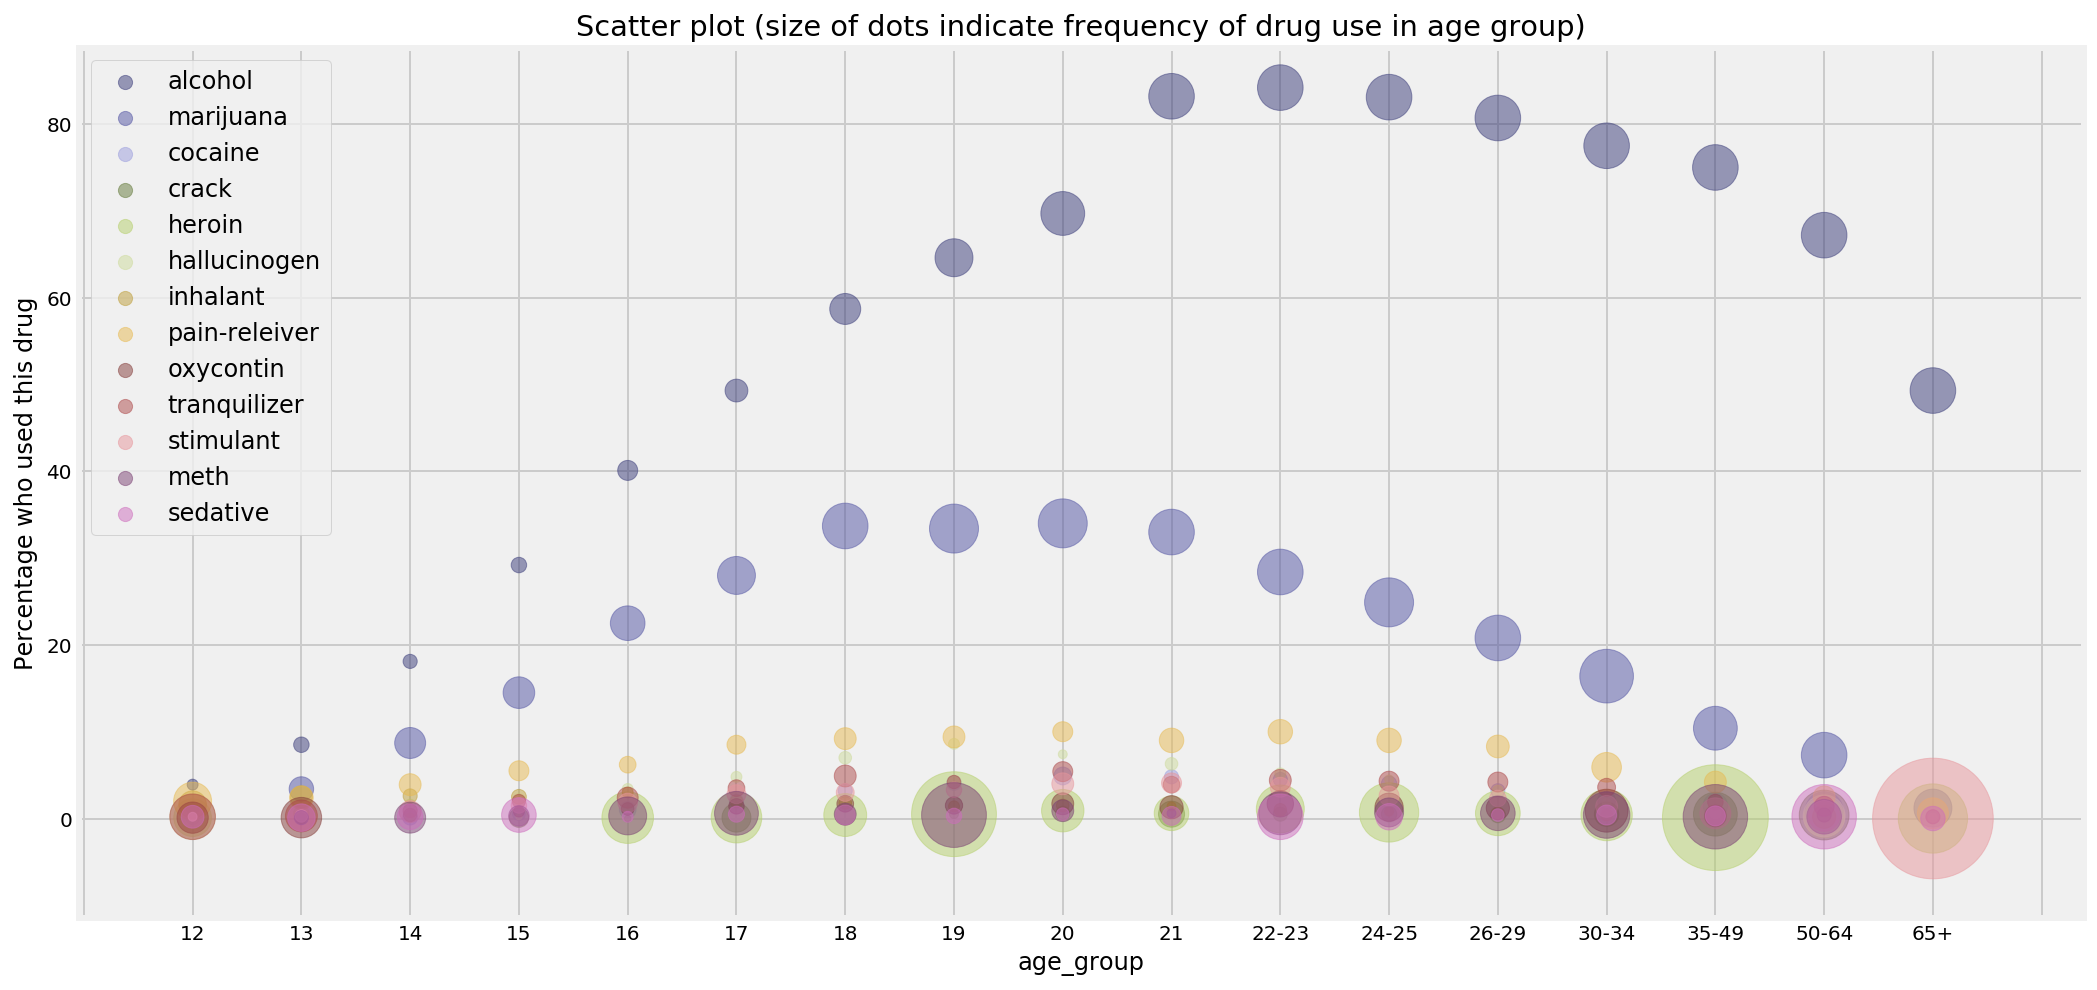

In [281]:
# Plot the scatter plot
# for each drug, plot drug usage vs age groups. Size of dots is the frequency used by age group.

# initialise a list of drugs
drugs = [c.replace('-use','') for c in cols_drug_use]

# set up cmap values for different drugs so that we can color them differently
import matplotlib
cmap = matplotlib.cm.get_cmap('tab20b')
drug_color = [cmap(i/len(drugs)) for i,drug in enumerate(drugs)]

#Start Figure
#---------------------------------------
# Initialize a matplotlib "figure"
f, ax = plt.subplots(figsize=(16,8))

# set up the x axis to follow age group
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xticklabels(pd.Series(['','',]).append(drug_df['age']))


# do scatter plot for each drug
for i,drug in enumerate(drugs):
    _ = drug_df.plot.scatter(x="age_group", y=cols_drug_use[i], color=drug_color[i], label=drug, ax=ax, s=drug_df[cols_drug_frequency[i]]*10, alpha=0.5);

lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=12)
for handle in lgnd.legendHandles:
    handle.set_sizes([50.0])
    
ax.set_ylabel('Percentage who used this drug')
ax.set_title('Scatter plot (size of dots indicate frequency of drug use in age group)')


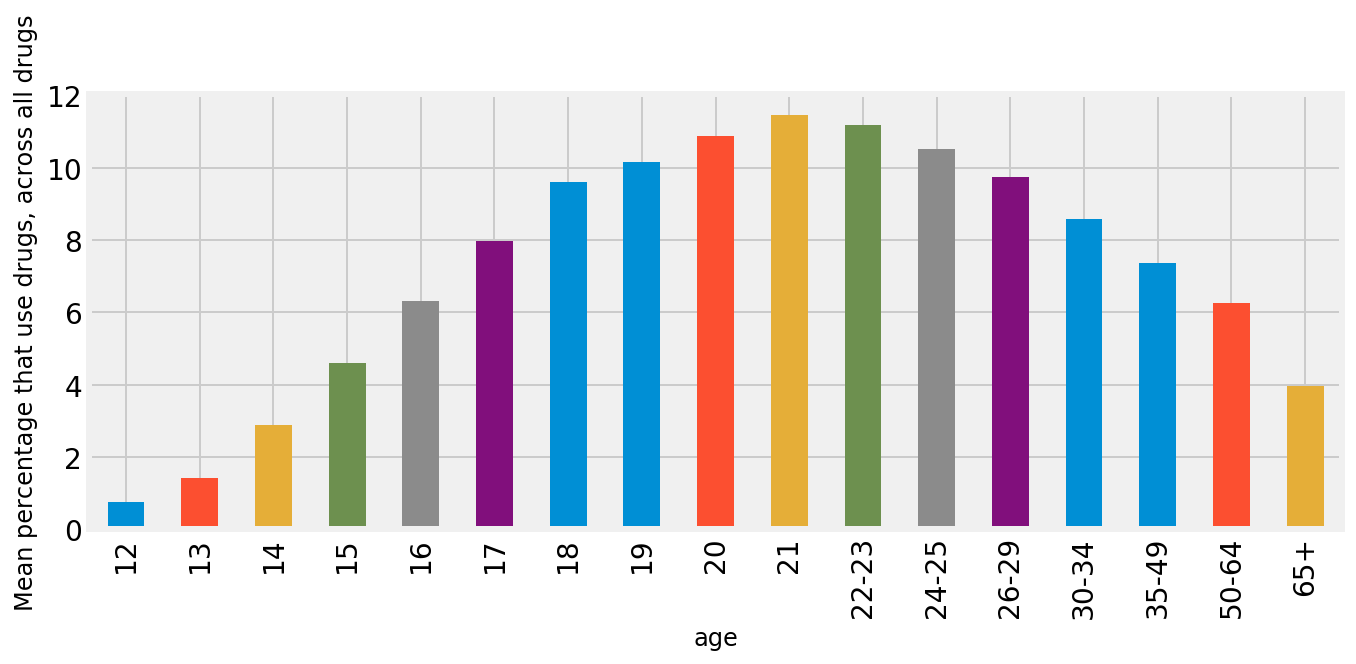

In [247]:
# Plot the mean drug use against age groups
ax = drug_df.plot(x='age',y='mean_drug_use',kind='bar', figsize=(10,4), fontsize=14,legend=False)
_ = ax.set_ylabel('Mean percentage that use drugs, across all drugs', fontsize=12)

#### Correlations

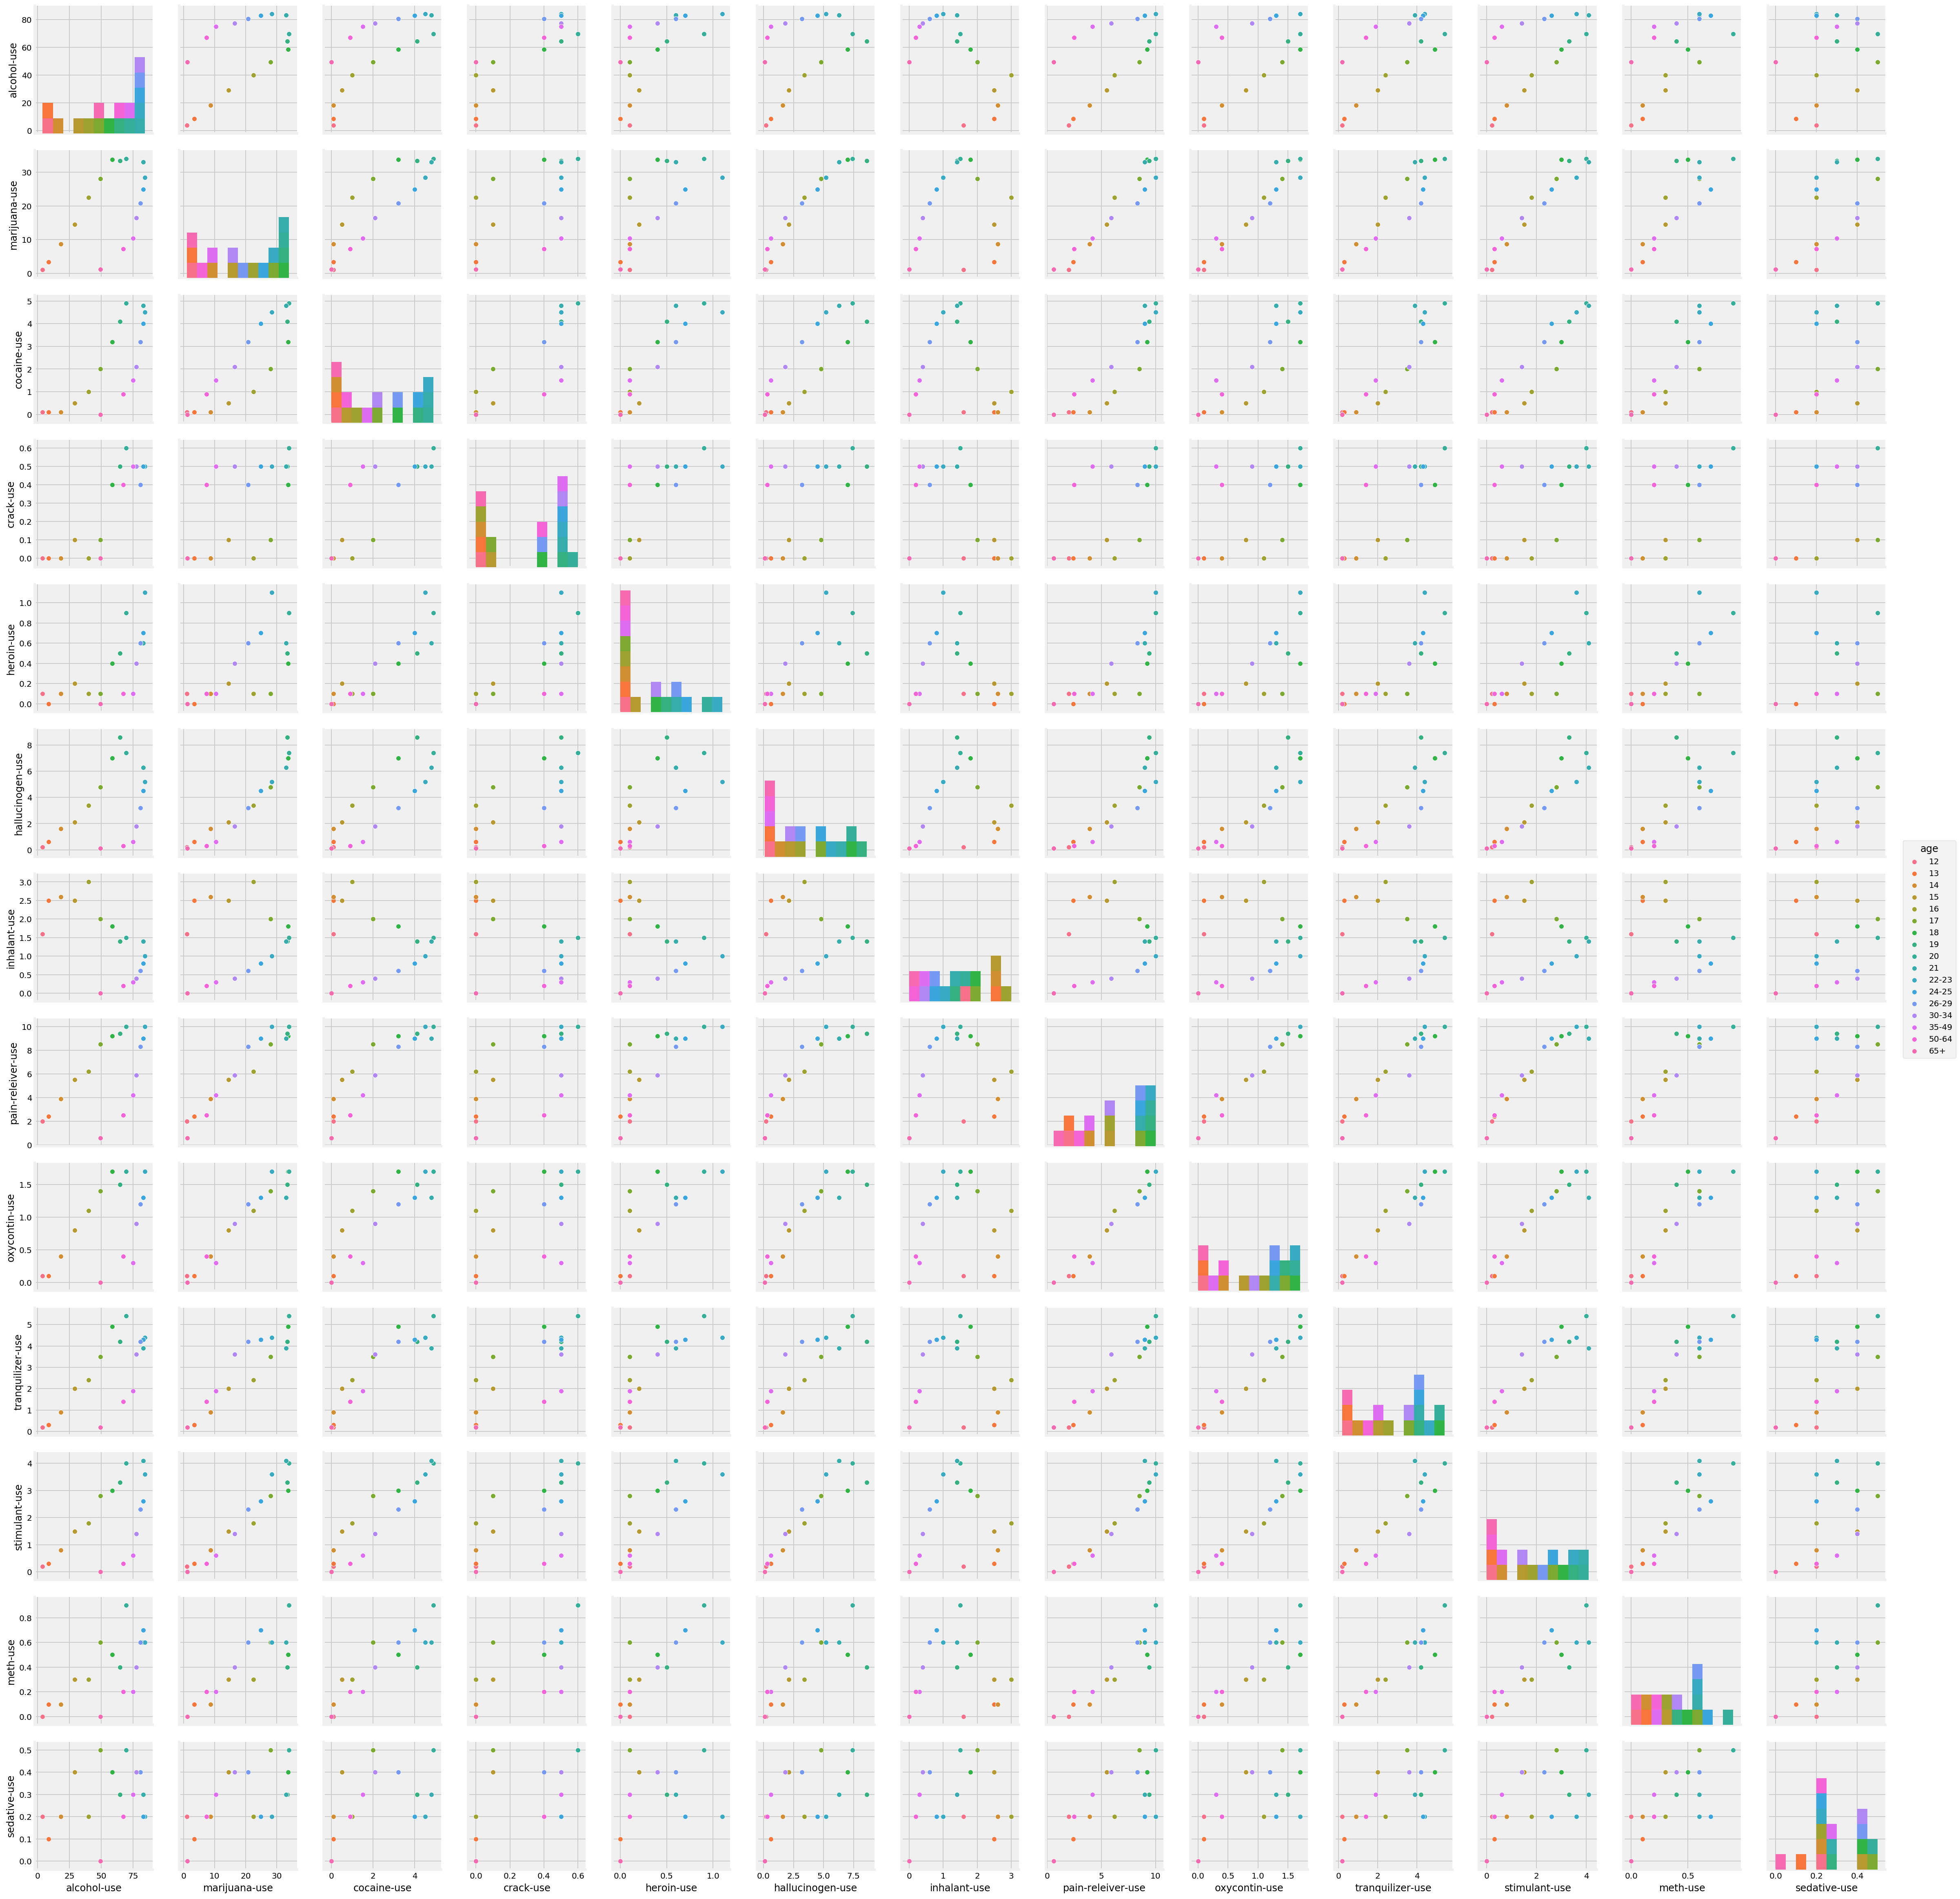

In [214]:
# pairplots to find correlation
l = [c for c in cols_drug_use]
l.insert(0,'age')
g = sns.pairplot(drug_df[l],hue='age')

In [182]:
# calculate correlations between drug use
drug_df[cols_drug_use].corr()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack-use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin-use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen-use,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant-use,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain-releiver-use,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666
oxycontin-use,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929
tranquilizer-use,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618


<img src="https://png.icons8.com/nolan/40/000000/test-tube.png" style="float: left; margin: 5px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue">
It seems that usage of some pairs of drugs seem to be correlated, e.g. correlation coefficient for % use for concaine and marijuana is 0.883789.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [302]:
# Calculate if cocaine and marijuana usage are correlated by checking the p-value from spearman correlation
x = drug_df['cocaine-use']
y = drug_df['marijuana-use']
corr,p_value = stats.spearmanr(x, y, axis=0)

print('Correlation is {}.'.format(corr))
print('Probability of this correlation being NOT statistically significant is {}.'.format(p_value))
print('That the cocaine and marijuana drug usage are correlated is {}.'.format(p_value < 0.05))

Correlation is 0.8985905984970894.
Probability of this correlation being NOT statistically significant is 9.572092503252772e-07.
That the cocaine and marijuana drug usage are correlated is True.


<img src="https://png.icons8.com/nolan/40/000000/test-tube.png" style="float: left; margin: 5px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue">
    
**Report**


Hypothesis: Cocaine and Marijuana usage is correlated.

Null hypothesis H0: The correlation is not statistically significant.
Alternate hypothesis H1: The correlation is statistically significant.

Conclusions:
- p<0.05
- we can reject the null hypothesis (H0)
- the samples come from the different populations
- we can say there is a statistically significant correlation between Cocaine and Marijuana use.
- we can say Cocaine and Marijuana usage is correlated.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

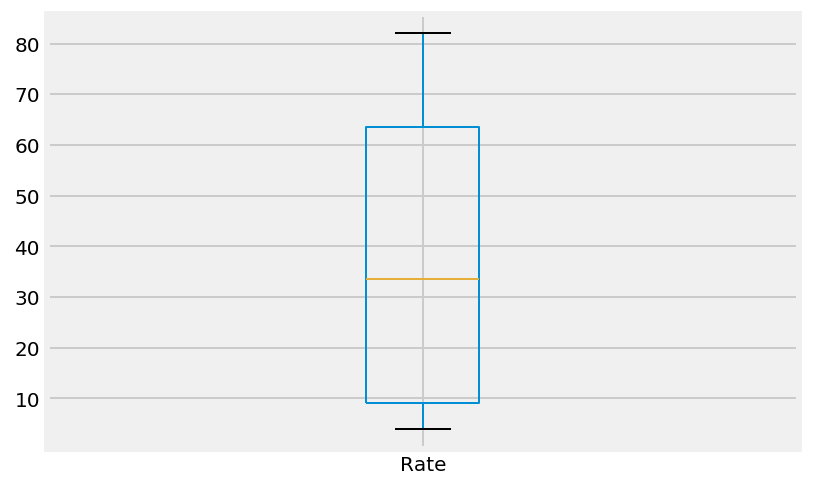

In [287]:
_ = sat_df['Rate'].plot.box()

In [295]:
# Assuming Rate is normally distributed, let's see if any values are outliers, i.e. they are 3 standard deviations away from mean
# calculate std dev
rate_std = sat_df['Rate'].std()
rate_mean = sat_df['Rate'].mean()

# calculate upper and lower boundaries beyond which values are outliers
upper, lower = rate_mean + 3 * rate_std, rate_mean - 3 * rate_std
upper, lower
# any values more than 3 times standard deviation are considered outliers
# it's impossible cos the upper and lower boundaries are above 100 and negative respectively.

(119.059210372454, -44.751518064761704)

<img src="https://png.icons8.com/office/40/000000/test-passed.png" style="float: left; margin: 0px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue">

#### Outliers for Rate variable
<br/>
1. The boxplot above for *Rate* variable does not indicate outliers.  Neither does assuming normal distribution and using 68–95–99.7 rule.
2. Outlier definition
 * When using boxplots, outliers are data points located outside the fences (“whiskers”) of the boxplot (i.e. outside 1.5 times the interquartile range above the upper quartile and bellow the lower quartile).
 * When using 68–95–99.7 rule, outlier values are more than 3 standard deviations away from mean.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [297]:
stats.spearmanr(sat_df['Verbal'], sat_df['Math'], axis=0)

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

In [299]:
stats.pearsonr(sat_df['Verbal'], sat_df['Math'])

(0.899870852544429, 1.192002673306768e-19)

<img src="https://png.icons8.com/office/40/000000/test-passed.png" style="float: left; margin: 0px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue">

#### Pearson vs Spearman correlation outcome
<br/>
The Spearman correlation coefficient value is in the same direction as that of Pearson, but higher and p-value is smaller. 
The Spearman correlation coefficient seems to indicate more strongly the correlation between Verbal and Math.

Process of calculating the spearman rank correlation:
1. Find the ranks for each observation / subject.
2. Calculate the difference in the ranks for each subject, $d$.
3. 
### $$ \text{spearman correlation}\;r = 1 - \frac{6\sum  d_i^2}{n(n^2-1)} $$

Where: 

- $n$ is the number of observed values
- $d$ is the difference in ranks between the 2 variables for the same observation


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [311]:
sat_df['Rate_percentile'] = sat_df['Rate'].apply(lambda x: stats.percentileofscore(sat_df['Rate'], x))
sat_df[sat_df['State']=='CA']['Rate_percentile']

23    56.730769
Name: Rate_percentile, dtype: float64

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

<img src="https://png.icons8.com/nolan/40/000000/test-tube.png" style="float: left; margin: 5px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue">
    
1. Percentile scoring is useful for scaling the score and trimming away the outliers.

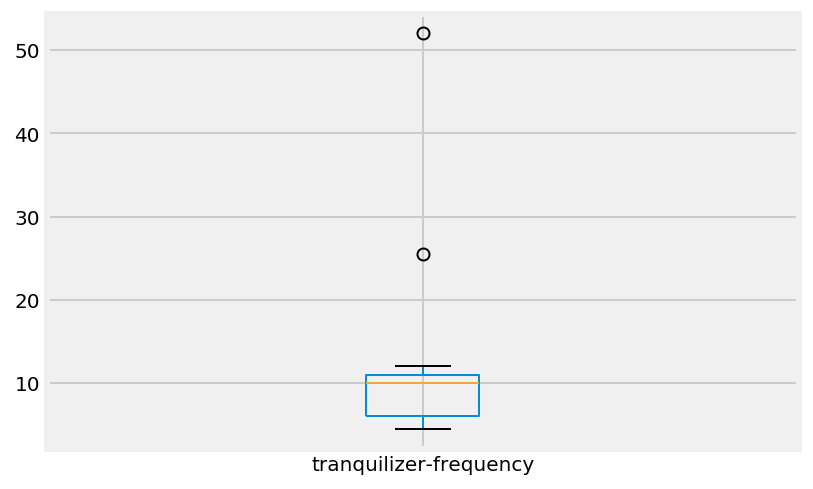

In [315]:
drug_df['tranquilizer-frequency'].plot.box()

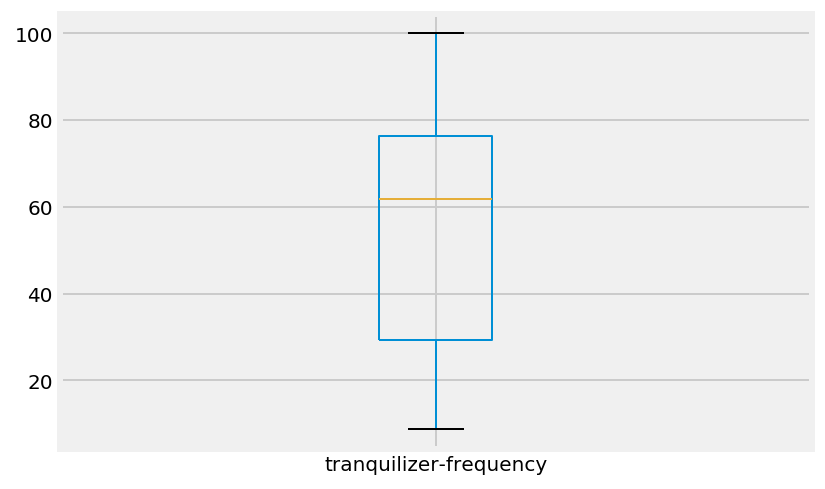

In [316]:
drug_df['tranquilizer-frequency'].apply(lambda x: stats.percentileofscore(drug_df['tranquilizer-frequency'], x)).plot.box()

<img src="https://png.icons8.com/nolan/40/000000/test-tube.png" style="float: left; margin: 5px 15px 0px 0px; height: 45px">
<font color="DarkSlateBlue">
    
The scores are scaled and outliers are removed.

<a href="https://icons8.com">Icon pack by Icons8</a>